In [77]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
from tensorflow import keras

In [78]:
from tensorflow.keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [79]:
trainX.shape

(60000, 28, 28)

In [80]:
testX.shape

(10000, 28, 28)

In [81]:
trainX = trainX.reshape(-1, 28,28, 1)
testX = testX.reshape(-1, 28,28, 1)
trainX.shape, testX.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [82]:
trainX.dtype, testX.dtype


(dtype('uint8'), dtype('uint8'))

In [83]:
trainX = trainX.astype('float32')

In [84]:
testX = testX.astype('float32')

In [85]:
trainX.dtype, testX.dtype


(dtype('float32'), dtype('float32'))

In [86]:
import numpy as np

In [87]:
trainX = trainX / np.max(trainX)
testX = testX / np.max(testX)

In [88]:
np.max(trainX), np.max(testX)


(1.0, 1.0)

In [89]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y = train_test_split(trainX,
                                                             trainX,
                                                             test_size=0.2,
                                                             random_state=13)

In [90]:
batch_size = 64
epochs = 20
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))
num_classes = 10

# Encoder

In [91]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32  #Input Layer
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)  #First hidden layer
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64  #second hidden layer
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)    #third hidden layer
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)  #fourth hidden layer
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)    #fifth hidden layer
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)  #Output
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

# Decoder

In [92]:
def decoder(conv4):    
    #decoder
    #conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    #conv4 = BatchNormalization()(conv4)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [93]:
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [94]:
autoencoder.summary()


Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_46 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_47 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 64)       

In [95]:
autoencoder_train = autoencoder.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_x, valid_y))


Epoch 1/20
750/750 [==============================] - 12s 17ms/step - loss: 0.0192 - val_loss: 0.0124
Epoch 2/20
750/750 [==============================] - 12s 16ms/step - loss: 0.0092 - val_loss: 0.0088
Epoch 3/20
750/750 [==============================] - 12s 16ms/step - loss: 0.0073 - val_loss: 0.0081
Epoch 4/20
750/750 [==============================] - 12s 16ms/step - loss: 0.0061 - val_loss: 0.0062
Epoch 5/20
750/750 [==============================] - 12s 16ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 6/20
750/750 [==============================] - 12s 16ms/step - loss: 0.0045 - val_loss: 0.0065
Epoch 7/20
750/750 [==============================] - 12s 17ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 8/20
750/750 [==============================] - 12s 17ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 9/20
750/750 [==============================] - 12s 17ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 10/20
750/750 [==============================] - 12s 17ms/step - loss: 0.003

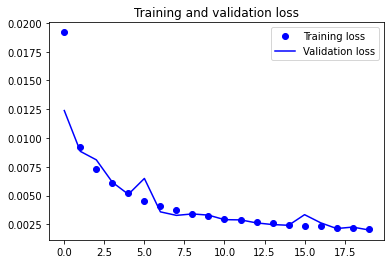

In [96]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(20)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [97]:
autoencoder.save_weights('autoencoder.h5')



In [98]:
# Change the labels from categorical to one-hot encoding
train_y_one_hot = to_categorical(trainY)
test_y_one_hot = to_categorical(testY)


In [99]:
train_X,valid_X,train_label,valid_label = train_test_split(trainX,train_y_one_hot,test_size=0.2,random_state=13)


In [100]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [25]:
#classification model

In [26]:
#####MLP
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    den1 = Dense(64, activation='relu')(den)
    out = Dense(num_classes, activation='softmax')(den1)
    return out

In [110]:
#####CONV
def fc(enco):
    #flat = Flatten()(enco)
    conv1 = Conv2D(128, (3, 3), activation='relu', padding='same')(enco)
    max1 = MaxPooling2D((2, 2), strides=(2,2))(conv1)
    flat = Flatten()(max1)
    
    #conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(max1)
    #max2 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(conv2)
    out = Dense(num_classes, activation='softmax')(flat)
    return out

In [111]:
encode = encoder(input_img)
full_model = Model(input_img,fc(encode))

In [112]:
for l1,l2 in zip(full_model.layers[:19],autoencoder.layers[0:19]):
    l1.set_weights(l2.get_weights())

In [113]:
autoencoder.get_weights()[0][1]


array([[[-0.06458951, -0.12101363,  0.1917443 ,  0.06301707,
          0.09078442, -0.13780133, -0.2537381 ,  0.3028224 ,
         -0.20558242, -0.22507168,  0.17636561,  0.26872197,
          0.09513223, -0.05340387, -0.15143684,  0.03256997,
         -0.24445902,  0.21918565, -0.04624458, -0.24491467,
          0.14439209,  0.1981577 , -0.1917659 ,  0.04471782,
          0.08864937,  0.05886013, -0.21666984,  0.06598727,
         -0.05642964,  0.06617812, -0.07223777,  0.09733734]],

       [[ 0.16306789, -0.03151816,  0.32430518,  0.02244924,
          0.18360412,  0.2740819 , -0.2972979 ,  0.06985057,
         -0.24108346,  0.21841612,  0.02166108, -0.13987814,
          0.08331388,  0.3775639 , -0.2795508 ,  0.27233115,
         -0.06577637,  0.09723113,  0.21374834, -0.36393207,
          0.4853588 ,  0.69603294, -0.23419575, -0.1312703 ,
          0.18962687, -0.29286098, -0.07338028,  0.18625209,
          0.29588956,  0.23484506,  0.10867884, -0.27293426]],

       [[-0.079697

In [114]:
full_model.get_weights()[0][1]


array([[[-0.06458951, -0.12101363,  0.1917443 ,  0.06301707,
          0.09078442, -0.13780133, -0.2537381 ,  0.3028224 ,
         -0.20558242, -0.22507168,  0.17636561,  0.26872197,
          0.09513223, -0.05340387, -0.15143684,  0.03256997,
         -0.24445902,  0.21918565, -0.04624458, -0.24491467,
          0.14439209,  0.1981577 , -0.1917659 ,  0.04471782,
          0.08864937,  0.05886013, -0.21666984,  0.06598727,
         -0.05642964,  0.06617812, -0.07223777,  0.09733734]],

       [[ 0.16306789, -0.03151816,  0.32430518,  0.02244924,
          0.18360412,  0.2740819 , -0.2972979 ,  0.06985057,
         -0.24108346,  0.21841612,  0.02166108, -0.13987814,
          0.08331388,  0.3775639 , -0.2795508 ,  0.27233115,
         -0.06577637,  0.09723113,  0.21374834, -0.36393207,
          0.4853588 ,  0.69603294, -0.23419575, -0.1312703 ,
          0.18962687, -0.29286098, -0.07338028,  0.18625209,
          0.29588956,  0.23484506,  0.10867884, -0.27293426]],

       [[-0.079697

In [115]:
for layer in full_model.layers[0:19]:
    layer.trainable = False

In [116]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [117]:
full_model.summary()


Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_68 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_69 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 14, 14, 64)      

In [118]:
classify_train = full_model.fit(train_X, train_label, batch_size=256,epochs=10,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/10
188/188 [==============================] - 3s 17ms/step - loss: 0.4281 - accuracy: 0.8557 - val_loss: 0.3073 - val_accuracy: 0.8879
Epoch 2/10
188/188 [==============================] - 3s 16ms/step - loss: 0.2211 - accuracy: 0.9216 - val_loss: 0.2911 - val_accuracy: 0.9006
Epoch 3/10
188/188 [==============================] - 3s 16ms/step - loss: 0.1626 - accuracy: 0.9421 - val_loss: 0.2704 - val_accuracy: 0.9072
Epoch 4/10
188/188 [==============================] - 3s 16ms/step - loss: 0.1219 - accuracy: 0.9579 - val_loss: 0.2804 - val_accuracy: 0.9083
Epoch 5/10
188/188 [==============================] - 3s 16ms/step - loss: 0.0871 - accuracy: 0.9705 - val_loss: 0.2987 - val_accuracy: 0.9069
Epoch 6/10
188/188 [==============================] - 3s 16ms/step - loss: 0.0706 - accuracy: 0.9762 - val_loss: 0.3382 - val_accuracy: 0.8997
Epoch 7/10
188/188 [==============================] - 3s 16ms/step - loss: 0.0487 - accuracy: 0.9844 - val_loss: 0.3115 - val_accuracy: 0.9131

In [119]:
full_model.save_weights('autoencoder_classification.h5')


In [120]:
for layer in full_model.layers[0:19]:
    layer.trainable = True

In [121]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [122]:
classify_train = full_model.fit(train_X, train_label, batch_size=64,epochs=10,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2483 - accuracy: 0.9175 - val_loss: 0.3447 - val_accuracy: 0.8982
Epoch 2/10
750/750 [==============================] - 9s 12ms/step - loss: 0.1894 - accuracy: 0.9332 - val_loss: 0.3770 - val_accuracy: 0.8890
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.1494 - accuracy: 0.9469 - val_loss: 0.3234 - val_accuracy: 0.9046
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 0.1243 - accuracy: 0.9558 - val_loss: 0.3572 - val_accuracy: 0.8990
Epoch 5/10
750/750 [==============================] - 9s 12ms/step - loss: 0.1077 - accuracy: 0.9620 - val_loss: 0.3985 - val_accuracy: 0.8955
Epoch 6/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0958 - accuracy: 0.9660 - val_loss: 0.4355 - val_accuracy: 0.9015
Epoch 7/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0838 - accuracy: 0.9704 - val_loss: 0.6014 - val_accuracy: 0.9080

In [123]:
full_model.save_weights('classification_complete.h5')


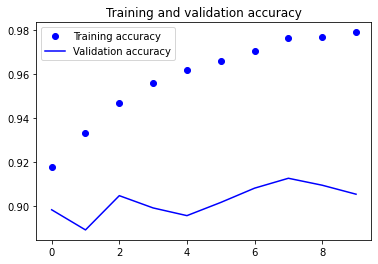

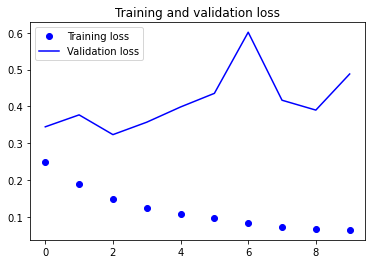

In [124]:
accuracy = classify_train.history['accuracy']
val_accuracy = classify_train.history['val_accuracy']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [125]:
#test set evaluation
test_eval = full_model.evaluate(testX, test_y_one_hot, verbose=0)


In [126]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5200155973434448
Test accuracy: 0.8967999815940857


In [127]:
#Predict Labels
predicted_classes = full_model.predict(testX)


In [128]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [129]:
predicted_classes.shape, testY.shape


((10000,), (10000,))

Found 8959 correct labels


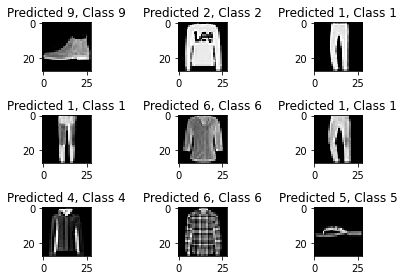

In [130]:
correct = np.where(predicted_classes==testY)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(testX[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], testY[correct]))
    plt.tight_layout()

Found 1041 incorrect labels


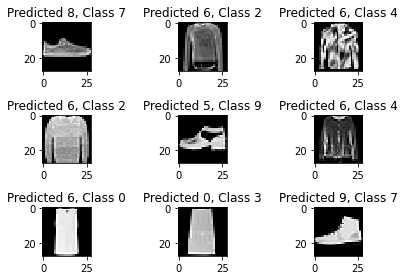

In [131]:
incorrect = np.where(predicted_classes!=testY)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(testX[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], testY[incorrect]))
    plt.tight_layout()

In [132]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(testY, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.80      0.83      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.93      0.78      0.85      1000
     Class 3       0.90      0.88      0.89      1000
     Class 4       0.84      0.84      0.84      1000
     Class 5       0.97      0.99      0.98      1000
     Class 6       0.64      0.82      0.72      1000
     Class 7       0.97      0.95      0.96      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

